In [13]:
%matplotlib inline

import nltk.data;

from gensim.models import word2vec;
from gensim.models import Word2Vec;

from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

import pandas as pd;
import numpy as np;

import os;
import time;
import logging;
import sys;
import multiprocessing;
import matplotlib.pyplot as plt;
from itertools import cycle;

import pandas as pd  
import time as time

from wordcloud import WordCloud, ImageColorGenerator

from gensim.parsing.preprocessing import preprocess_string, strip_multiple_whitespaces, strip_non_alphanum, strip_punctuation

from gensim.models import Phrases

In [14]:
start = time.time()
data = pd.read_csv('~/Documents/CWTS_Server/citances_sample_20181223.rpt', sep = "\t")
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 26.654795169830322 secs


First I will clean the text. Fortunately, the data here has already been subsetted into sentences, which removes one potentially difficult task. I will use the gensim utility functions to preprocess the data, remove whitespaces, remove punctuation, and remove non-alphanumeric data. 

In [6]:
data.columns

Index(['doi', 'sentence_seq', 'text', 'n_sentences', 'n_citations_in_sentence',
       'wos_field'],
      dtype='object')

For the below code, I am pulling heavily from a tutorial at the following url

https://medium.com/ml2vec/using-word2vec-to-analyze-reddit-comments-28945d8cee57

I replaced some of the parameters with ones that seemed to make a little more sense given the smaller size of my data. 



In [6]:
from gensim.models import Phrases
start = time.time();

# Lets make sure that we are logging—this will take a long time and its good to get updates
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)


# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 50;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Transforming to bigram representation
bigram_transformer = Phrases(features)

# Initialize and train the model
print("Training model...");
model = word2vec.Word2Vec(bigram_transformer[features], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model, just in case we can use it later
model_name = "model_citance_sample";
model.save(model_name);

print('Total time: ' + str((time.time() - start)) + ' secs')

Training model...


/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Total time: 7584.249466896057 secs


In [3]:
model = Word2Vec.load("model_citance_sample")

In [4]:
model.wv.most_similar("knowledge")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('expertise', 0.8169784545898438),
 ('tacit_knowledge', 0.8160210251808167),
 ('scientific_knowledge', 0.8063349723815918),
 ('information', 0.8056001663208008),
 ('knowledge_base', 0.7498481273651123),
 ('innovation', 0.712672233581543),
 ('knowledge_about', 0.7070292830467224),
 ('prior_knowledge', 0.6998311877250671),
 ('skills', 0.6964640617370605),
 ('explicit_knowledge', 0.6928906440734863)]

In [8]:
model.wv.most_similar("controversial")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('debatable', 0.805150032043457),
 ('highly_controversial', 0.8046971559524536),
 ('equivocal', 0.7985600829124451),
 ('still_controversial', 0.7937566041946411),
 ('inconclusive', 0.7920565605163574),
 ('unclear', 0.7854132652282715),
 ('somewhat_controversial', 0.7759248614311218),
 ('contradictory', 0.7567384243011475),
 ('questionable', 0.7429936528205872),
 ('still_debated', 0.7305647730827332)]

In [9]:
model.wv.most_similar('discovered')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('noticed', 0.7874438762664795),
 ('identified', 0.7866150140762329),
 ('documented', 0.7635195255279541),
 ('postulated', 0.7634725570678711),
 ('noted', 0.7579987645149231),
 ('found', 0.7508113384246826),
 ('suggested', 0.7456482648849487),
 ('claimed', 0.7398945689201355),
 ('demonstrated', 0.7388673424720764),
 ('reported', 0.7384119033813477)]

In [10]:
model.wv.most_similar('uncertain')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ambiguous', 0.735744297504425),
 ('imprecise', 0.7326213121414185),
 ('unknown', 0.7228853106498718),
 ('unpredictable', 0.676755428314209),
 ('unreliable', 0.6517151594161987),
 ('time_varying', 0.649237871170044),
 ('infeasible', 0.636352002620697),
 ('incomplete_information', 0.63588547706604),
 ('unrealistic', 0.6344642043113708),
 ('inaccurate', 0.6273403763771057)]

For the following code, I take almost directly form the following blog, which I have relied upon or most of this experimnet,

https://medium.com/ml2vec/using-word2vec-to-analyze-reddit-comments-28945d8cee57

This code will cluster together all words from the word2vec model, display and save a series of wordcloud figures.  

In [323]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

Z = model.wv.vectors
centers, clusters = clustering_on_wordvecs(Z, 16);
centroid_map = dict(zip(model.wv.index2word, clusters));

In [316]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i + 1).zfill(2)] = ["" + index2word[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df;

top_words = get_top_words(model.wv.index2word, 1000, centers, Z);

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


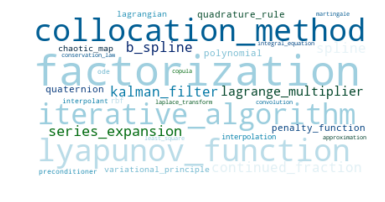

In [311]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="white", max_words=30, max_font_size=80, colormap=cmap, relative_scaling = 0, prefer_horizontal = 0.98);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')
    
cmaps = cycle([
        'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
        'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
        'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(20):
    print(i)
    col = next(cmaps);
    display_cloud(i+1, "ocean")

In [325]:
top_words

,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05,Cluster #06,Cluster #07,Cluster #08,Cluster #09,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14,Cluster #15,Cluster #16
1,self_presentation,astrocytic,regularized,pokorny,corticosteroid_therapy,923,dimethylamine,financial_services,cowpea,piston,kamchatka,1exp,matlab_software,erbb4,titanium_oxide,tied
2,morality,vsmc,hermite,witkowski,intracranial_hemorrhage,875,benzoic_acid,public_funding,shrimps,cylinder,coastal_plain,2s2,imagej,hnf4a,copper_oxide,overwhelmed
3,compassion,podocytes,factorization,de_boeck,cholelithiasis,661,resorcinol,federal_government,acacia,roller,tethys,cosf,computer_software,caveolin_1,vanadium_oxide,cognizant
4,gratitude,smooth_muscles,chebyshev,zobel,renal_insufficiency,954,benzoate,private_companies,actinomycetes,wall,karoo,02p,software_program,fgfr,znfe2o4,attuned
5,deception,schwann_cells,newton_method,beckerman,gerd,605,thiourea,usaid,grapevines,rotating,patagonia,2ln,bruker,mek1,silicon_oxide,reminded
6,sympathy,enteric_neurons,lanczos,werth,adhf,915,ethanolamine,overseas,crab,blade,lacustrine_deposits,nµ,software_imagej,isg15,molybdenum_oxide,undermined
7,entitlement,microglia_activation,polynomial_approximation,meurer,neutropenia,872,maleic_acid,catering,senecio,conical,altiplano,eµ,bruker_axs,nod1,composite_electrodes,confronted_with
8,intentionality,carotid_body,recursive,fuerst,hyperbilirubinemia,845,p_cresol,dubai,mulberry,vibrating,upper_cretaceous,arctan,imagej_software,cox2,si3n4,put
9,impression_management,peripheral_nerves,galerkin,pardini,pancreatitis,790,hydroquinone,public_housing,asparagus,cylindrical,playa,cosa,afni,pkd1,nano_powders,communicated
10,prosocial_behavior,pituitary,variational,filion,amenorrhea,910,oleate,railways,faba_bean,inner_cylinder,wadi,0r,hamburg_germany,histone_methyltransferase,tio2_sio2,remembered


Now we will repeat the above process, except now we will be working with the abstracts of these texts, rather than the citances. 

Lets also save the words, so that we might try to use them inside ggplot for another visualizaiton

In [5]:
top_words.to_csv("top_words_citance.csv", sep = "\t")

NameError: name 'top_words' is not defined

In [5]:
start = time.time()
pubs = pd.read_csv('~/Documents/CWTS_Server/abstracts_sample_20181225.rpt', sep = "\t")
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 3.5271201133728027 secs


In [11]:
import re

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle');
CUSTOM_FILTERS = [lambda x: x.lower(), strip_multiple_whitespaces, strip_punctuation, strip_non_alphanum]

start = time.time();


abstract_features = []
pubs_no_na = pubs.dropna(subset = ["abstract"])
for text in pubs_no_na["abstract"]:
        
    sentences = tokenizer.tokenize(text);
    sentences = [re.sub("[\.]", "", sentence) for sentence in sentences];
    for sentence in sentences:
        clean_text = preprocess_string(sentence, CUSTOM_FILTERS)
        abstract_features.append(clean_text)
        
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 144.1734161376953 secs


In [12]:
start = time.time();

# Lets make sure that we are logging—this will take a long time and its good to get updates
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)


# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 50;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Transforming to bigram representation
bigram_transformer = Phrases(abstract_features)

# Initialize and train the model
print("Training model...");
model = word2vec.Word2Vec(bigram_transformer[abstract_features], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model, just in case we can use it later
model_name = "model_abstract_sample2";
model.save(model_name);

print('Total time: ' + str((time.time() - start)) + ' secs')

2018-12-26 13:29:57,150 : INFO : collecting all words and their counts
2018-12-26 13:29:57,155 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2018-12-26 13:29:57,504 : INFO : PROGRESS: at sentence #10000, processed 221662 words and 138903 word types
2018-12-26 13:29:57,868 : INFO : PROGRESS: at sentence #20000, processed 444972 words and 243764 word types
2018-12-26 13:29:58,259 : INFO : PROGRESS: at sentence #30000, processed 668273 words and 337608 word types
2018-12-26 13:29:58,670 : INFO : PROGRESS: at sentence #40000, processed 892824 words and 424902 word types
2018-12-26 13:29:59,045 : INFO : PROGRESS: at sentence #50000, processed 1121574 words and 506392 word types
2018-12-26 13:29:59,406 : INFO : PROGRESS: at sentence #60000, processed 1345872 words and 583533 word types
2018-12-26 13:29:59,772 : INFO : PROGRESS: at sentence #70000, processed 1570463 words and 657948 word types
2018-12-26 13:30:00,178 : INFO : PROGRESS: at sentence #80000, processed 179

2018-12-26 13:30:26,741 : INFO : PROGRESS: at sentence #740000, processed 16579531 words and 3878113 word types
2018-12-26 13:30:27,105 : INFO : PROGRESS: at sentence #750000, processed 16805282 words and 3916562 word types
2018-12-26 13:30:27,470 : INFO : PROGRESS: at sentence #760000, processed 17030395 words and 3954878 word types
2018-12-26 13:30:27,843 : INFO : PROGRESS: at sentence #770000, processed 17254983 words and 3993048 word types
2018-12-26 13:30:28,211 : INFO : PROGRESS: at sentence #780000, processed 17477558 words and 4030836 word types
2018-12-26 13:30:28,599 : INFO : PROGRESS: at sentence #790000, processed 17702654 words and 4068146 word types
2018-12-26 13:30:29,012 : INFO : PROGRESS: at sentence #800000, processed 17927219 words and 4106284 word types
2018-12-26 13:30:29,442 : INFO : PROGRESS: at sentence #810000, processed 18151397 words and 4143171 word types
2018-12-26 13:30:29,862 : INFO : PROGRESS: at sentence #820000, processed 18374967 words and 4180136 wor

2018-12-26 13:30:56,639 : INFO : PROGRESS: at sentence #1470000, processed 32920982 words and 6359448 word types
2018-12-26 13:30:57,061 : INFO : PROGRESS: at sentence #1480000, processed 33148040 words and 6390306 word types
2018-12-26 13:30:57,474 : INFO : PROGRESS: at sentence #1490000, processed 33370680 words and 6420728 word types
2018-12-26 13:30:57,878 : INFO : PROGRESS: at sentence #1500000, processed 33594190 words and 6451113 word types
2018-12-26 13:30:58,301 : INFO : PROGRESS: at sentence #1510000, processed 33820764 words and 6481939 word types
2018-12-26 13:30:58,686 : INFO : PROGRESS: at sentence #1520000, processed 34047834 words and 6512895 word types
2018-12-26 13:30:59,081 : INFO : PROGRESS: at sentence #1530000, processed 34274897 words and 6543894 word types
2018-12-26 13:30:59,458 : INFO : PROGRESS: at sentence #1540000, processed 34499223 words and 6575258 word types
2018-12-26 13:30:59,840 : INFO : PROGRESS: at sentence #1550000, processed 34722096 words and 66

Training model...


2018-12-26 13:31:09,907 : INFO : PROGRESS: at sentence #10000, processed 198308 words, keeping 27546 word types
2018-12-26 13:31:10,826 : INFO : PROGRESS: at sentence #20000, processed 398186 words, keeping 43578 word types
2018-12-26 13:31:11,755 : INFO : PROGRESS: at sentence #30000, processed 598035 words, keeping 56511 word types
2018-12-26 13:31:12,706 : INFO : PROGRESS: at sentence #40000, processed 799143 words, keeping 67683 word types
2018-12-26 13:31:13,672 : INFO : PROGRESS: at sentence #50000, processed 1003841 words, keeping 77295 word types
2018-12-26 13:31:14,611 : INFO : PROGRESS: at sentence #60000, processed 1204357 words, keeping 86140 word types
2018-12-26 13:31:15,542 : INFO : PROGRESS: at sentence #70000, processed 1405434 words, keeping 94080 word types
2018-12-26 13:31:16,504 : INFO : PROGRESS: at sentence #80000, processed 1607576 words, keeping 101521 word types
2018-12-26 13:31:17,450 : INFO : PROGRESS: at sentence #90000, processed 1807680 words, keeping 108

2018-12-26 13:32:18,260 : INFO : PROGRESS: at sentence #730000, processed 14641348 words, keeping 313032 word types
2018-12-26 13:32:19,203 : INFO : PROGRESS: at sentence #740000, processed 14839268 words, keeping 315073 word types
2018-12-26 13:32:20,212 : INFO : PROGRESS: at sentence #750000, processed 15041924 words, keeping 317043 word types
2018-12-26 13:32:21,245 : INFO : PROGRESS: at sentence #760000, processed 15243468 words, keeping 319032 word types
2018-12-26 13:32:22,265 : INFO : PROGRESS: at sentence #770000, processed 15444646 words, keeping 320943 word types
2018-12-26 13:32:23,269 : INFO : PROGRESS: at sentence #780000, processed 15643700 words, keeping 322823 word types
2018-12-26 13:32:24,239 : INFO : PROGRESS: at sentence #790000, processed 15845310 words, keeping 324630 word types
2018-12-26 13:32:25,191 : INFO : PROGRESS: at sentence #800000, processed 16046735 words, keeping 326561 word types
2018-12-26 13:32:26,111 : INFO : PROGRESS: at sentence #810000, processe

2018-12-26 13:33:25,353 : INFO : PROGRESS: at sentence #1440000, processed 28865248 words, keeping 429643 word types
2018-12-26 13:33:26,281 : INFO : PROGRESS: at sentence #1450000, processed 29063946 words, keeping 431153 word types
2018-12-26 13:33:27,268 : INFO : PROGRESS: at sentence #1460000, processed 29264301 words, keeping 432523 word types
2018-12-26 13:33:28,209 : INFO : PROGRESS: at sentence #1470000, processed 29469026 words, keeping 433883 word types
2018-12-26 13:33:29,128 : INFO : PROGRESS: at sentence #1480000, processed 29672284 words, keeping 435271 word types
2018-12-26 13:33:30,025 : INFO : PROGRESS: at sentence #1490000, processed 29872050 words, keeping 436666 word types
2018-12-26 13:33:30,925 : INFO : PROGRESS: at sentence #1500000, processed 30071699 words, keeping 438178 word types
2018-12-26 13:33:31,840 : INFO : PROGRESS: at sentence #1510000, processed 30274677 words, keeping 439642 word types
2018-12-26 13:33:32,754 : INFO : PROGRESS: at sentence #1520000,

2018-12-26 13:34:28,692 : INFO : EPOCH 1 - PROGRESS: at 17.16% examples, 144643 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:34:29,711 : INFO : EPOCH 1 - PROGRESS: at 17.72% examples, 144413 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:34:30,733 : INFO : EPOCH 1 - PROGRESS: at 18.29% examples, 144205 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:34:31,749 : INFO : EPOCH 1 - PROGRESS: at 18.85% examples, 144034 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:34:32,788 : INFO : EPOCH 1 - PROGRESS: at 19.44% examples, 143966 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:34:33,806 : INFO : EPOCH 1 - PROGRESS: at 20.03% examples, 143999 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:34:34,839 : INFO : EPOCH 1 - PROGRESS: at 20.61% examples, 143965 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:34:35,869 : INFO : EPOCH 1 - PROGRESS: at 21.20% examples, 143944 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:34:36,885 : INFO : EPOCH 1 - PROGRESS: at 21.79% examples, 143971 words/s, in_qsiz

2018-12-26 13:35:43,521 : INFO : EPOCH 1 - PROGRESS: at 59.79% examples, 143625 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:35:44,554 : INFO : EPOCH 1 - PROGRESS: at 60.35% examples, 143546 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:35:45,557 : INFO : EPOCH 1 - PROGRESS: at 60.91% examples, 143517 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:35:46,581 : INFO : EPOCH 1 - PROGRESS: at 61.48% examples, 143520 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:35:47,583 : INFO : EPOCH 1 - PROGRESS: at 62.05% examples, 143487 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:35:48,601 : INFO : EPOCH 1 - PROGRESS: at 62.60% examples, 143440 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:35:49,639 : INFO : EPOCH 1 - PROGRESS: at 63.19% examples, 143428 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:35:50,653 : INFO : EPOCH 1 - PROGRESS: at 63.78% examples, 143445 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:35:51,668 : INFO : EPOCH 1 - PROGRESS: at 64.38% examples, 143462 words/s, in_qsiz

2018-12-26 13:36:54,628 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-12-26 13:36:54,630 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-12-26 13:36:54,631 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-12-26 13:36:54,632 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-12-26 13:36:54,634 : INFO : EPOCH - 1 : training on 35780107 raw words (25148734 effective words) took 175.8s, 143050 effective words/s
2018-12-26 13:36:55,663 : INFO : EPOCH 2 - PROGRESS: at 0.62% examples, 151938 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:36:56,688 : INFO : EPOCH 2 - PROGRESS: at 1.24% examples, 151421 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:36:57,725 : INFO : EPOCH 2 - PROGRESS: at 1.85% examples, 150385 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:36:58,756 : INFO : EPOCH 2 - PROGRESS: at 2.46% examples, 150184 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:36:59,795 : INFO : EPOCH 2 - PROG

2018-12-26 13:38:06,591 : INFO : EPOCH 2 - PROGRESS: at 42.06% examples, 147045 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:38:07,623 : INFO : EPOCH 2 - PROGRESS: at 42.64% examples, 146982 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:38:08,634 : INFO : EPOCH 2 - PROGRESS: at 43.20% examples, 146877 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:38:09,648 : INFO : EPOCH 2 - PROGRESS: at 43.79% examples, 146865 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:38:10,710 : INFO : EPOCH 2 - PROGRESS: at 44.40% examples, 146839 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:38:11,735 : INFO : EPOCH 2 - PROGRESS: at 44.98% examples, 146798 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:38:12,738 : INFO : EPOCH 2 - PROGRESS: at 45.54% examples, 146708 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:38:13,767 : INFO : EPOCH 2 - PROGRESS: at 46.13% examples, 146656 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:38:14,808 : INFO : EPOCH 2 - PROGRESS: at 46.75% examples, 146678 words/s, in_qsiz

2018-12-26 13:39:21,588 : INFO : EPOCH 2 - PROGRESS: at 84.76% examples, 145034 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:39:22,609 : INFO : EPOCH 2 - PROGRESS: at 85.34% examples, 145030 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:39:23,631 : INFO : EPOCH 2 - PROGRESS: at 85.92% examples, 145025 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:39:24,670 : INFO : EPOCH 2 - PROGRESS: at 86.51% examples, 145004 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:39:25,678 : INFO : EPOCH 2 - PROGRESS: at 87.09% examples, 145015 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:39:26,687 : INFO : EPOCH 2 - PROGRESS: at 87.68% examples, 145019 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:39:27,721 : INFO : EPOCH 2 - PROGRESS: at 88.26% examples, 145006 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:39:28,739 : INFO : EPOCH 2 - PROGRESS: at 88.85% examples, 145008 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:39:29,776 : INFO : EPOCH 2 - PROGRESS: at 89.43% examples, 144988 words/s, in_qsiz

2018-12-26 13:40:28,635 : INFO : EPOCH 3 - PROGRESS: at 23.24% examples, 145786 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:40:29,659 : INFO : EPOCH 3 - PROGRESS: at 23.82% examples, 145734 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:40:30,703 : INFO : EPOCH 3 - PROGRESS: at 24.41% examples, 145617 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:40:31,746 : INFO : EPOCH 3 - PROGRESS: at 25.00% examples, 145519 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:40:32,765 : INFO : EPOCH 3 - PROGRESS: at 25.59% examples, 145496 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:40:33,778 : INFO : EPOCH 3 - PROGRESS: at 26.18% examples, 145492 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:40:34,837 : INFO : EPOCH 3 - PROGRESS: at 26.76% examples, 145346 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:40:35,861 : INFO : EPOCH 3 - PROGRESS: at 27.34% examples, 145306 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:40:36,880 : INFO : EPOCH 3 - PROGRESS: at 27.92% examples, 145285 words/s, in_qsiz

2018-12-26 13:41:43,530 : INFO : EPOCH 3 - PROGRESS: at 66.27% examples, 144891 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:41:44,552 : INFO : EPOCH 3 - PROGRESS: at 66.85% examples, 144880 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:41:45,565 : INFO : EPOCH 3 - PROGRESS: at 67.43% examples, 144884 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:41:46,578 : INFO : EPOCH 3 - PROGRESS: at 68.02% examples, 144890 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:41:47,625 : INFO : EPOCH 3 - PROGRESS: at 68.60% examples, 144851 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:41:48,667 : INFO : EPOCH 3 - PROGRESS: at 69.21% examples, 144880 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:41:49,708 : INFO : EPOCH 3 - PROGRESS: at 69.80% examples, 144855 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:41:50,725 : INFO : EPOCH 3 - PROGRESS: at 70.39% examples, 144856 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:41:51,736 : INFO : EPOCH 3 - PROGRESS: at 70.98% examples, 144863 words/s, in_qsiz

2018-12-26 13:42:51,281 : INFO : EPOCH 4 - PROGRESS: at 4.74% examples, 145876 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:42:52,283 : INFO : EPOCH 4 - PROGRESS: at 5.32% examples, 146026 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:42:53,325 : INFO : EPOCH 4 - PROGRESS: at 5.94% examples, 146219 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:42:54,325 : INFO : EPOCH 4 - PROGRESS: at 6.55% examples, 146959 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:42:55,352 : INFO : EPOCH 4 - PROGRESS: at 7.16% examples, 147250 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:42:56,360 : INFO : EPOCH 4 - PROGRESS: at 7.76% examples, 147190 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:42:57,403 : INFO : EPOCH 4 - PROGRESS: at 8.33% examples, 146771 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:42:58,431 : INFO : EPOCH 4 - PROGRESS: at 8.95% examples, 146996 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:42:59,467 : INFO : EPOCH 4 - PROGRESS: at 9.56% examples, 147170 words/s, in_qsize 0, out_

2018-12-26 13:44:06,421 : INFO : EPOCH 4 - PROGRESS: at 47.69% examples, 143954 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:44:07,444 : INFO : EPOCH 4 - PROGRESS: at 48.23% examples, 143789 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:44:08,449 : INFO : EPOCH 4 - PROGRESS: at 48.76% examples, 143661 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:44:09,473 : INFO : EPOCH 4 - PROGRESS: at 49.32% examples, 143577 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:44:10,525 : INFO : EPOCH 4 - PROGRESS: at 49.88% examples, 143454 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:44:11,558 : INFO : EPOCH 4 - PROGRESS: at 50.41% examples, 143287 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:44:12,594 : INFO : EPOCH 4 - PROGRESS: at 50.95% examples, 143112 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:44:13,632 : INFO : EPOCH 4 - PROGRESS: at 51.50% examples, 143020 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:44:14,635 : INFO : EPOCH 4 - PROGRESS: at 52.03% examples, 142915 words/s, in_qsiz

2018-12-26 13:45:22,362 : INFO : EPOCH 4 - PROGRESS: at 88.18% examples, 139228 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:45:23,378 : INFO : EPOCH 4 - PROGRESS: at 88.77% examples, 139267 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:45:24,415 : INFO : EPOCH 4 - PROGRESS: at 89.35% examples, 139286 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:45:25,471 : INFO : EPOCH 4 - PROGRESS: at 89.93% examples, 139288 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:45:26,479 : INFO : EPOCH 4 - PROGRESS: at 90.50% examples, 139285 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:45:27,494 : INFO : EPOCH 4 - PROGRESS: at 91.06% examples, 139283 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:45:28,528 : INFO : EPOCH 4 - PROGRESS: at 91.65% examples, 139303 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:45:29,535 : INFO : EPOCH 4 - PROGRESS: at 92.24% examples, 139346 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:45:30,539 : INFO : EPOCH 4 - PROGRESS: at 92.82% examples, 139388 words/s, in_qsiz

2018-12-26 13:46:29,094 : INFO : EPOCH 5 - PROGRESS: at 26.54% examples, 145127 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:46:30,123 : INFO : EPOCH 5 - PROGRESS: at 27.15% examples, 145239 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:46:31,154 : INFO : EPOCH 5 - PROGRESS: at 27.75% examples, 145320 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:46:32,188 : INFO : EPOCH 5 - PROGRESS: at 28.34% examples, 145261 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:46:33,221 : INFO : EPOCH 5 - PROGRESS: at 28.92% examples, 145210 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:46:34,261 : INFO : EPOCH 5 - PROGRESS: at 29.50% examples, 145128 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:46:35,320 : INFO : EPOCH 5 - PROGRESS: at 30.10% examples, 145009 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:46:36,327 : INFO : EPOCH 5 - PROGRESS: at 30.68% examples, 145030 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:46:37,365 : INFO : EPOCH 5 - PROGRESS: at 31.28% examples, 144973 words/s, in_qsiz

2018-12-26 13:47:44,170 : INFO : EPOCH 5 - PROGRESS: at 68.65% examples, 142603 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:47:45,181 : INFO : EPOCH 5 - PROGRESS: at 69.24% examples, 142628 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:47:46,207 : INFO : EPOCH 5 - PROGRESS: at 69.83% examples, 142640 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:47:47,208 : INFO : EPOCH 5 - PROGRESS: at 70.42% examples, 142675 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:47:48,264 : INFO : EPOCH 5 - PROGRESS: at 71.01% examples, 142650 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:47:49,303 : INFO : EPOCH 5 - PROGRESS: at 71.63% examples, 142695 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:47:50,349 : INFO : EPOCH 5 - PROGRESS: at 72.25% examples, 142736 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:47:51,393 : INFO : EPOCH 5 - PROGRESS: at 72.86% examples, 142778 words/s, in_qsize 0, out_qsize 0
2018-12-26 13:47:52,395 : INFO : EPOCH 5 - PROGRESS: at 73.45% examples, 142811 words/s, in_qsiz

Total time: 1122.0727989673615 secs


In [221]:
model.wv.most_similar("regression")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('linear_regression', 0.8287765979766846),
 ('logistic_regression', 0.7831673622131348),
 ('regression_analysis', 0.782815158367157),
 ('regressions', 0.7708209753036499),
 ('univariate', 0.7562885284423828),
 ('multivariate', 0.755821168422699),
 ('regression_models', 0.7336349487304688),
 ('logistic', 0.7209181785583496),
 ('negative_binomial', 0.7204647064208984),
 ('multiple_linear', 0.7199587225914001)]

In [222]:
model.wv.most_similar('uncertain')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('unknown', 0.7797398567199707),
 ('imprecise', 0.6902613043785095),
 ('time_varying', 0.679482102394104),
 ('restrictive', 0.6593235731124878),
 ('ambiguous', 0.6523334383964539),
 ('stochastic', 0.6325812935829163),
 ('incorrect', 0.6234470009803772),
 ('imperfect', 0.6185747981071472),
 ('deterministic', 0.617194414138794),
 ('unconstrained', 0.6148145794868469)]

In [223]:
model.wv.most_similar('discovered')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('postulated', 0.7922104597091675),
 ('noticed', 0.7730064392089844),
 ('recently_reported', 0.7620360851287842),
 ('identified', 0.7517187595367432),
 ('uncovered', 0.7170093059539795),
 ('clarified', 0.7133961915969849),
 ('previously_demonstrated', 0.7119249105453491),
 ('recognized', 0.6969555616378784),
 ('found', 0.6956900954246521),
 ('noted', 0.682866096496582)]

In [224]:
model.wv.most_similar("controversial")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('still_limited', 0.8115819692611694),
 ('well_documented', 0.8044136762619019),
 ('still_controversial', 0.7957706451416016),
 ('less_clear', 0.7908711433410645),
 ('unclear', 0.7849380970001221),
 ('debated', 0.751497209072113),
 ('questionable', 0.7450261116027832),
 ('scarce', 0.7387233972549438),
 ('incompletely_understood', 0.7355901002883911),
 ('inconclusive', 0.7285963892936707)]

maybe an x & y plot, showing the similarity between a word, say "uncertain", and 1000 or so randomly sampled other words (or the next 1000 most similar). If the meaning is similar, then the similarity (sim for model 1 on the x-acis, sim for model 2 on the y) should be a diagonal line. 

In [12]:
from gensim.models import Word2Vec
abs_model = Word2Vec.load("model_abstract_sample")
citance_model = Word2Vec.load("model_citance_sample")

FileNotFoundError: [Errno 2] No such file or directory: 'model_abstract_sample'

In [25]:
def model_term_similarity(base_model, other_model, word_to_check, common_words):
            
    x_sim = []
    y_sim = []
    
    for common_word in shared:
        if common_word in other_model.wv.vocab:
            abs_sim = base_model.similarity(word_to_check, common_word)
            citance_sim = other_model.similarity(word_to_check, common_word)
            x_sim.append(abs_sim)
            y_sim.append(citance_sim)
        
    df = pd.DataFrame({'x':x_sim, 'y':y_sim, 'word':word_to_check})
    
    return(df)

def get_shared_words(base_model, other_model, topn_words = 10000):
    base_common = base_model.wv.index2entity[:topn_words]
    other_common = other_model.wv.index2entity[:topn_words]

    shared = []
    for word in base_common:
        if word in other_common:
            shared.append(word)

    return(shared)

shared = get_shared_words(abs_model, citance_model, topn_words = 10000)
df = model_term_similarity(abs_model, citance_model, "sulfoxide", shared)
df.plot('x', 'y', kind='scatter', alpha = 0.05)

NameError: name 'abs_model' is not defined

In [305]:
shared = get_shared_words(abs_model, citance_model, topn_words = 100000)
terms = ["the", "what", "literature", "very", "uncertain", "regression", "controversial", "discovered", "found", "usually", "london", "sulfoxide"]
all_df = pd.concat([model_term_similarity(abs_model, citance_model, term, shared) for term in terms])

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


In [307]:
len(shared)

33668

In [306]:
t

In [297]:
len(abs_model.wv.vocab)

36179

In [298]:
len(citance_model.wv.vocab)

113811

In [299]:
# The number of abstrace sentences
len(abstract_features)

1784155

In [300]:
# The number of citances
len(features)

6813984

In [21]:
os.getcwd()

'/Users/dakotamurray/Documents/citation_classification/exps/20181222_word2vec_bigger_data'

In [23]:
from gensim.models import Word2Vec
abs_model1 = Word2Vec.load("model_abstract_sample")
abs_model2 = Word2Vec.load("model_abstract_sample2")

In [24]:
shared = get_shared_words(abs_model1, abs_model2, topn_words = 10000)
df = model_term_similarity(abs_model1, abs_model2, "usually", shared)
df.plot('x', 'y', kind='scatter', alpha = 0.05)

NameError: name 'get_shared_words' is not defined

In [26]:
shared = get_shared_words(abs_model1, abs_model2, topn_words = 10000)
terms = ["report", "predict", "propose", "might",
         "assume", "may", "seem", "suggest", "cannot", "will", "should", 
         "could", "must", "indicate", "would", "appear"]
all_df = pd.concat([model_term_similarity(abs_model1, abs_model2, term, shared) for term in terms])

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


In [27]:
all_df.to_csv("model_baseline_similarity_data.txt", sep = "\t")

### 